# Оглавление
1. [Изучение данных из файла](#start)
    1. [Вывод](#conclusion1)
2. [Предобработка данных](#preprocessing)
    1. [Вывод](#conclusion2)
3. [Исследовательский анализ данных](#eda)
    1. [Вывод](#conclusion3)
4. [Анализ данных](#data_analysis)
    1. [Вывод](#conclusion4)
5. [Проверка гипотез](#hypothesis_testing)
    1. [Вывод](#conclusion5)
6. [Общий вывод](#conclusion) 

# Описание данных
Данные за 2016 год могут быть неполными.

**1. Количественные (числовые):**

    1. Непрерывные
        1. Year_of_Release — год выпуска
    2. Дискретные
        1. Critic_Score — оценка критиков (максимум 100)
        2. User_Score — оценка пользователей (максимум 10)
        3. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
        4. NA_sales — продажи в Северной Америке (миллионы проданных копий)
        5. EU_sales — продажи в Европе (миллионы проданных копий)
        6. JP_sales — продажи в Японии (миллионы проданных копий)
        7. Other_sales — продажи в других странах (миллионы проданных копий)
   
**2. Категориальные (качественные):**
* Name — название игры
* Platform — платформа
* Genre — жанр игры


**3. Логические (булевы):**
* Отсутсвуют


# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Изучение данных из файла
<a id="start"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # для нормального отображение вещественных чисел

In [3]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('/Users/nikitagudilin/Desktop/YANDEX_PRAKTIKUM/PROJECTS/sborniy/games.csv')

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Пустой `except` лучше не писать, т.к. он ловит <b>все</b> исключения вообще, даже те, которые бросил не твой код, например, при нажатии на стоп в тетрадке (прервать работу ядра) будет обрабатываться в таком случае внутри `except`, и если там в `except'e` написано что-то странное, то поведение будет не то, которое ожидается в таких ситуациях. ЛУчше либо указывать тип исключения, либо здесь просто можно пользоваться `import os; if os.path.exsits(..): else:..` 
    
Раз ты делаешь проект локально, то надеюсь у тебя окружение совпадает с окружением из тренажера, если нет, то здесь стоят такие библиотеки:
</div>

In [4]:
! conda list -e

# This file may be used to create an environment using:
# $ conda create --name <env> --file <this file>
# platform: linux-64
_libgcc_mutex=0.1=conda_forge
_openmp_mutex=4.5=1_gnu
absl-py=0.12.0=pypi_0
alembic=1.4.3=pyh9f0ad1d_0
argon2-cffi=20.1.0=pypi_0
astor=0.8.1=pypi_0
async_generator=1.10=py_0
attrs=19.1.0=pypi_0
backcall=0.2.0=pyh9f0ad1d_0
backports=1.0=py_2
backports.functools_lru_cache=1.6.1=py_0
beautifulsoup4=4.8.0=pypi_0
bleach=3.2.1=pyh9f0ad1d_0
blinker=1.4=py_1
blis=0.7.4=pypi_0
boto3=1.17.89=pypi_0
botocore=1.20.89=pypi_0
brotlipy=0.7.0=py37h5e8e339_1001
c-ares=1.16.1=h516909a_3
ca-certificates=2021.5.30=ha878542_0
cached-property=1.5.2=pypi_0
cachetools=4.2.2=pypi_0
catalogue=1.0.0=pypi_0
catboost=0.20.2=pypi_0
certifi=2021.5.30=py37h89c1867_0
certipy=0.1.3=py_0
cffi=1.14.4=py37h11fe52a_0
chardet=3.0.4=py37he5f6b98_1008
click=8.0.1=pypi_0
combo=0.1.2=pypi_0
conda=4.9.0=py37he5f6b98_1
conda-package-handling=1.7.3=py37h5e8e339_0
configurable-http-proxy=1.3.0=0
cryptography

In [5]:
df.info() #Получим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.columns #Проверим названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df['Year_of_Release'].value_counts() #Проверим уникальные значения 

2008.000    1427
2009.000    1426
2010.000    1255
2007.000    1197
2011.000    1136
2006.000    1006
2005.000     939
2002.000     829
2003.000     775
2004.000     762
2012.000     653
2015.000     606
2014.000     581
2013.000     544
2016.000     502
2001.000     482
1998.000     379
2000.000     350
1999.000     338
1997.000     289
1996.000     263
1995.000     219
1994.000     121
1993.000      62
1981.000      46
1992.000      43
1991.000      41
1982.000      36
1986.000      21
1989.000      17
1983.000      17
1990.000      16
1987.000      16
1988.000      15
1985.000      14
1984.000      14
1980.000       9
Name: Year_of_Release, dtype: int64

Необходимо изменить тип данных в Year_of_Release

In [8]:
df['Rating'].value_counts() #Проверим уникальные значения 

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [9]:
df['Genre'].value_counts() #Проверим уникальные значения 

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [10]:
df['Platform'].value_counts() #Проверим уникальные значения 

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

Необходимо привести названия столбцов к нижнему регистру

In [11]:
df.sample(10) #Посмотрим на содержание 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11833,Open Season,PSP,2006.000,Platform,0.070,0.000,0.000,0.010,nan,tbd,E10+
13784,Mat Hoffman's Pro BMX 2,GC,2002.000,Sports,0.030,0.010,0.000,0.000,70.000,tbd,T
10363,Jampack Volume 14 (RP-T),PS2,2006.000,Misc,0.050,0.040,0.000,0.010,nan,NaN,NaN
3054,100 Classic Books,DS,2008.000,Misc,0.120,0.520,0.000,0.020,70.000,6,NaN
11004,Blood of Bahamut,DS,2009.000,Role-Playing,0.000,0.000,0.090,0.000,nan,NaN,NaN
9939,CSI: Crime Scene Investigation,XB,2004.000,Adventure,0.090,0.030,0.000,0.000,45.000,7.3,M
4613,Crash: Mind Over Mutant,DS,2008.000,Platform,0.380,0.000,0.000,0.030,45.000,5.8,E
13868,Headhunter: Redemption,PS2,2004.000,Action,0.020,0.010,0.000,0.000,62.000,6.7,M
1345,Hasbro Family Game Night,Wii,2008.000,Puzzle,0.960,0.330,0.000,0.130,63.000,7.5,E
6885,Grand Theft Auto,GBA,2004.000,Action,0.170,0.060,0.000,0.000,68.000,7.1,M


В User_Score присутствует tbd, следует выяснить

In [12]:
df['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
0.7       2
1.5       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

In [13]:
df.head(10) #Посмотрим на содержание 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN


In [14]:
df.tail(10) #Посмотрим на содержание 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.000,Adventure,0.000,0.010,0.000,0.000,63.000,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.000,Shooter,0.010,0.000,0.000,0.000,nan,tbd,T
16707,Aiyoku no Eustia,PSV,2014.000,Misc,0.000,0.000,0.010,0.000,nan,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.000,Platform,0.010,0.000,0.000,0.000,nan,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.000,Racing,0.000,0.000,0.000,0.000,nan,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.000,Action,0.000,0.000,0.010,0.000,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006.000,Sports,0.000,0.010,0.000,0.000,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.000,Adventure,0.000,0.000,0.010,0.000,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003.000,Platform,0.010,0.000,0.000,0.000,nan,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.000,Simulation,0.000,0.000,0.010,0.000,nan,NaN,NaN


In [15]:
df.isna().sum() #Проверим на пропуски

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [16]:
for el in df.isna().sum(): #Посмотрим сколько пропуски занимают процентов в df
    print("{:.2%}".format(el/df.shape[0]))

0.01%
0.00%
1.61%
0.01%
0.00%
0.00%
0.00%
0.00%
51.32%
40.09%
40.48%


<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Хорошая идея, реализовать её можно так:
</div>

In [23]:
# Код ревьюера
(df.isna().mean() * 100).to_frame().style.background_gradient(cmap='coolwarm')

,0
Name,0.0119653
Platform,0
Year_of_Release,1.60933
Genre,0.0119653
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,51.3192
User_Score,40.0897


Необходимо заполнить пропуски в Critic_Score, User_Score, Rating, поскольку Название игры и Год релиза заполнить нет возможности


In [24]:
df.duplicated().sum() #Проверим на дублированные строки

0

In [25]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000,16715.000,16715.000,16715.000,16715.000,8137.000
mean,2006.485,0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,1980.000,0.000,0.000,0.000,0.000,13.000
25%,2003.000,0.000,0.000,0.000,0.000,60.000
50%,2007.000,0.080,0.020,0.000,0.010,71.000
75%,2010.000,0.240,0.110,0.040,0.030,79.000
max,2016.000,41.360,28.960,10.220,10.570,98.000


Посмотрим на расположение данных и на выбросы

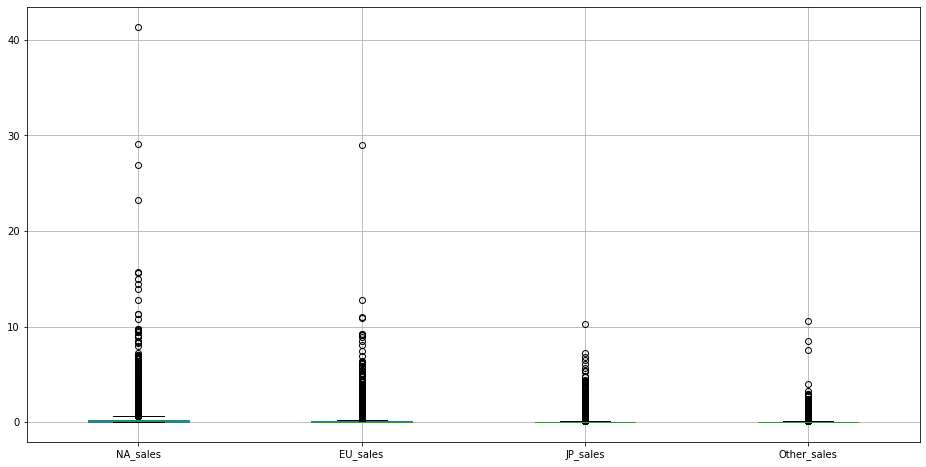

In [26]:
df.boxplot(["NA_sales", 'EU_sales', 'JP_sales', 'Other_sales'], figsize=(16,8))

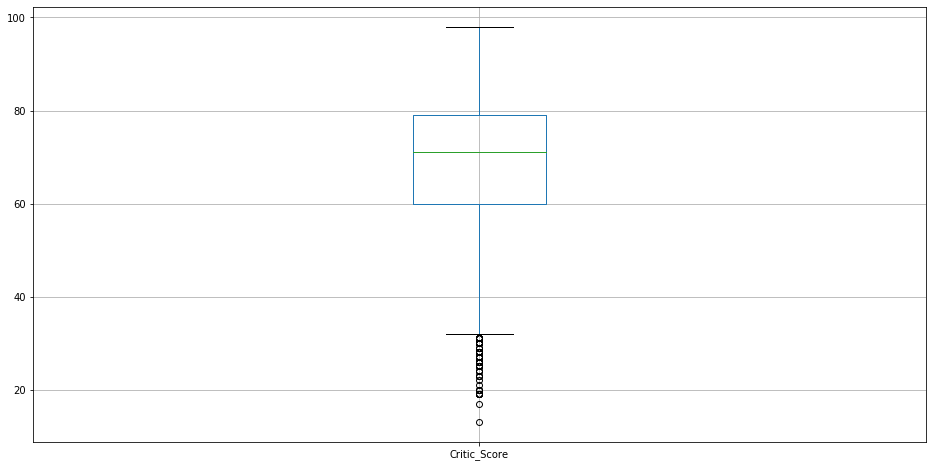

In [27]:
df.boxplot(['Critic_Score'], figsize=(16,8))

Построим гистограммы

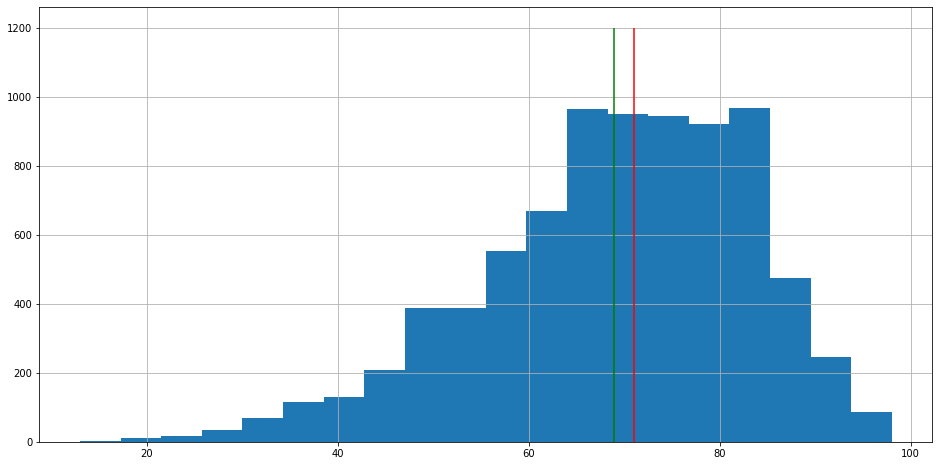

In [28]:
df['Critic_Score'].hist(bins=20, figsize=(16,8))
plt.vlines(x=df['Critic_Score'].median(), ymin=0, ymax=1200, label='median', colors='red')
plt.vlines(x=df['Critic_Score'].mean(), ymin=0, ymax=1200, label='mean', colors='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0837ac3b50>,
      dtype=object)

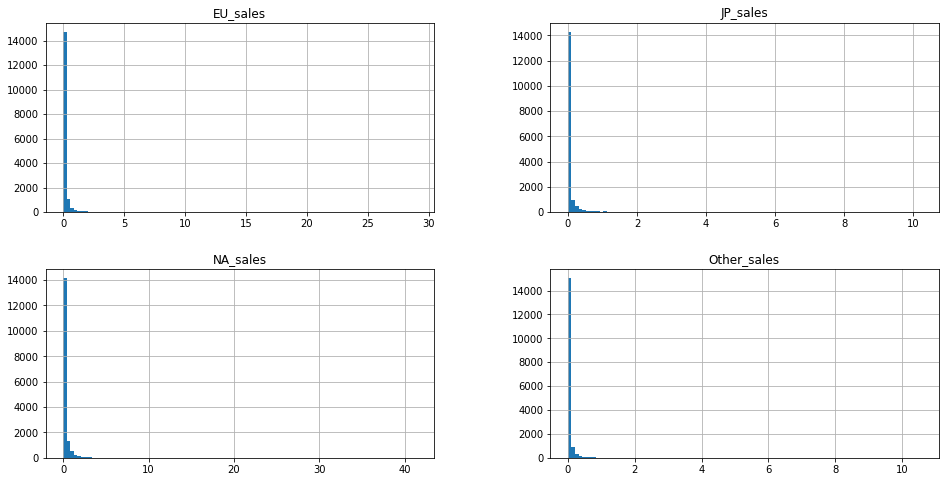

In [29]:
df[["NA_sales", 'EU_sales', 'JP_sales', 'Other_sales']].hist(bins=100, figsize=(16,8))

###  Вывод
<a id="conclusion1"></a>

1. Необходимо привести названия столбцов к нижнему регистру
2. Следует заполнить пропуски в Critic_Score, User_Score, Rating, поскольку Название игры (Name) и Год релиза (Year_of_Release) заполнить нет возможности;
3. Дублированных записей нет
4. Требуется изменить тип данных в Year_of_Release 
5. В User_Score часто встречается tbd, следует выяснить откуда она появилось и заменить тип данных
6. В Critic_Score хранятся целые числа, следовательно, нужен тип данных int
7. В названиях некоторых игр присутсвуют годы их выпуска, следует выяснить - обрабатывать ли эти названия
8. В NA_sales и EU_sales много выбросов

## Предобработка данных
<a id="preprocessing"></a> 

Значения оказались пропущены в Name, например, по причине сбоя в кодировке, в Year_of_Release из-за правильного формата записи даты, а здесь вместо даты - год и он вещественное число, в Critic_Score, User_Score большой процент пропуска, который связан, видимио, с ошибкой при выгрузке, т.к. если их не заполнили из-за того, что они не набрали нужного кол-ва отзывов, заполнили бы их tbd. А в Rating организация ESRB еще не определила рейтинг и не присвоила подходящую возрастную категорию из-за чего появились пропуски.

Как уточнялось, TBD это обычно не вышедшие игры, или вышедшие совсем недавно и не набравшие критическую массу отзывов. Заменим на -1 и не будем учитывать при обработке. Годы в названиях игр - сохраним.


Приведем названия столбцов к нижнему регистру


In [30]:
df.columns = map(lambda x: x.lower(), df.columns)

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Можно ещё так: `df.columns = df.columns.str.lower()`
</div>

In [31]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [32]:
df['user_score'] = df['user_score'].replace('tbd', -1)

Теперь изменим тип данных, а некорректные значения пока проигнорируем

In [33]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore') 

Изменим тип данных в Year_of_Release и заполним пропуски. Как было отмечено выше, пропуски составляют 1.6%, а возможности заполнить нет - их смело можно удалить 

In [34]:
df.dropna(subset=['year_of_release'], inplace=True)

In [35]:
df['year_of_release'] = df['year_of_release'].astype(int)

Удалим игры без названия, их всего 0.01% 

In [36]:
df.dropna(subset=['name'], inplace=True)

Заполним пропуски в critic_score(51.32%), user_score(40.09%), rating(40.48%)

Rating — рейтинг от организации ESRB. Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию, поэтому мы не можем определить категорию на основании средних или частых значений по определенному жанру, поскольку это может сильно отличаться от действительности. Заполним пропущенные значений 'missed'  

А user_score и critic_score заполним на основании среднего по жанру и конкретизированному уровню продаж

Посчитаем суммарные продажи во всех регионах

In [37]:
df['sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] 

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Можно так: `df['sales'] = df[['na_sales','eu_sales',..]].sum(axis=1)`
</div>

In [38]:
df['sales'].describe() #Посмотрим на их распределение 

count   16444.000
mean        0.536
std         1.559
min         0.000
25%         0.060
50%         0.170
75%         0.470
max        82.540
Name: sales, dtype: float64

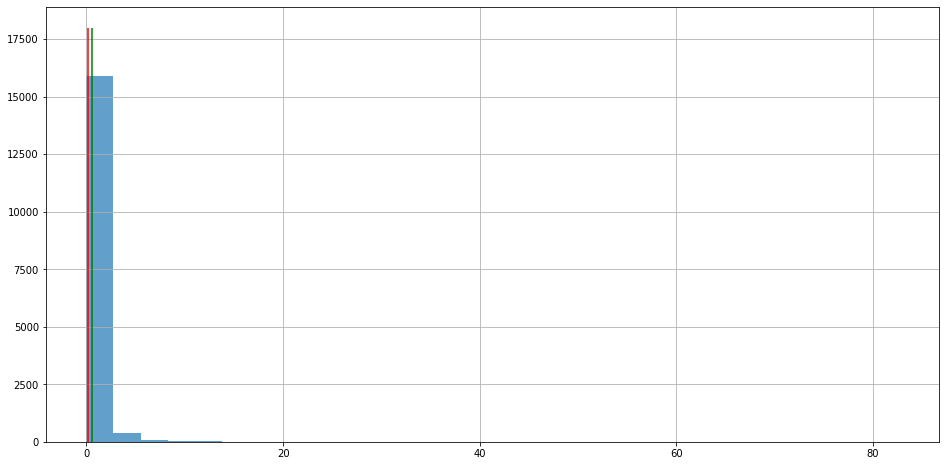

In [39]:
df['sales'].hist(bins=30, figsize=(16,8), alpha=0.7)
plt.vlines(x=df['sales'].median(), ymin=0, ymax=18000, label='median', colors='red')
plt.vlines(x=df['sales'].mean(), ymin=0, ymax=18000, label='mean', colors='green')

Конкретизируем продажи на 3 уровня - низкий, средний, высокий

In [40]:
def level_sales(sales):
    if sales < 0.1:
        return 'Низкий'
    elif sales <= 0.5:
        return 'Средний'
    elif sales > 0.5:
        return 'Высокий'

In [41]:
df['level_sales'] = df['sales'].apply(level_sales)

Теперь заполним пропуски в critic_score, user_score и rating

In [42]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(['genre',
                                        'level_sales'])['critic_score'].transform('median'))

In [43]:
df['user_score'] = df['user_score'].fillna(df.groupby(['genre',
                                        'level_sales'])['user_score'].transform('median'))

In [44]:
df['rating'] = df['rating'].fillna('missed')

Теперь изменим тип данных у critic_score

In [45]:
df['critic_score'] = df['critic_score'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null float64
rating             16444 non-null object
sales              16444 non-null float64
level_sales        16444 non-null object
dtypes: float64(6), int64(2), object(5)
memory usage: 1.8+ MB


###  Вывод
<a id="conclusion2"></a>

1. Описали проблемы появления пропусков
2. Заполнили пропуски
3. Преобразовали данные в нужные типы данных
4. Обработали tbd
5. Изменили названия столбцов (ниж. регистр) 
6. Удалили некоторые строки с пропусками  

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

В целом адекватное решение, но всё таки это не совсем корректная замена, можно было пропуски просто оставить
</div>

## Исследовательский анализ данных
<a id="eda"></a>

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

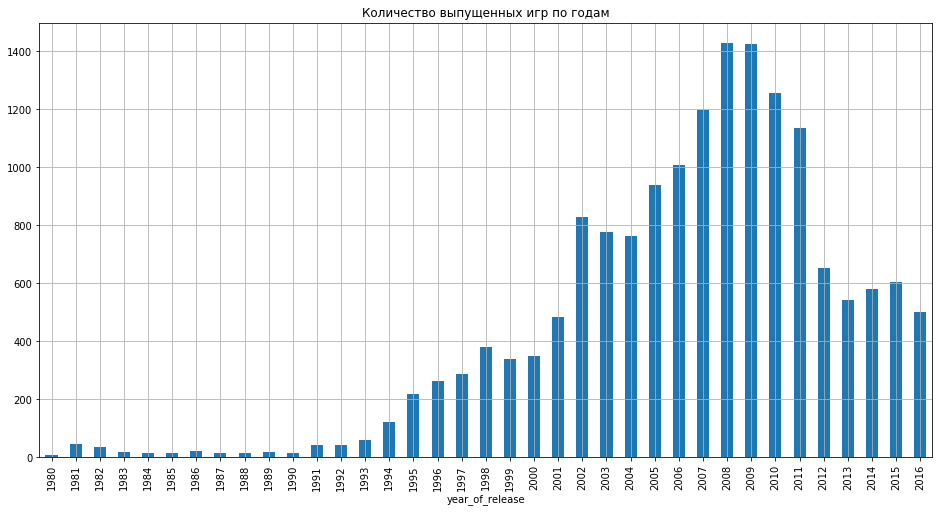

In [47]:
df.groupby('year_of_release')['name'].count().plot(title="Количество выпущенных игр по годам", kind='bar',
                                                   figsize=(16,8), grid=True)

Исходя из данных видно 4 этапа: 1 - 1980-1993, 2 - 1994-2001, 3 - 2002-2011, 4 - 2012-2016. НО Цель - предсказание продаж на 2017 год. Тогда, очевидно, что нас интересуют ближайшие годы (4 этап) и самые популярные в эти годы платформы.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами (10 платформ) и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

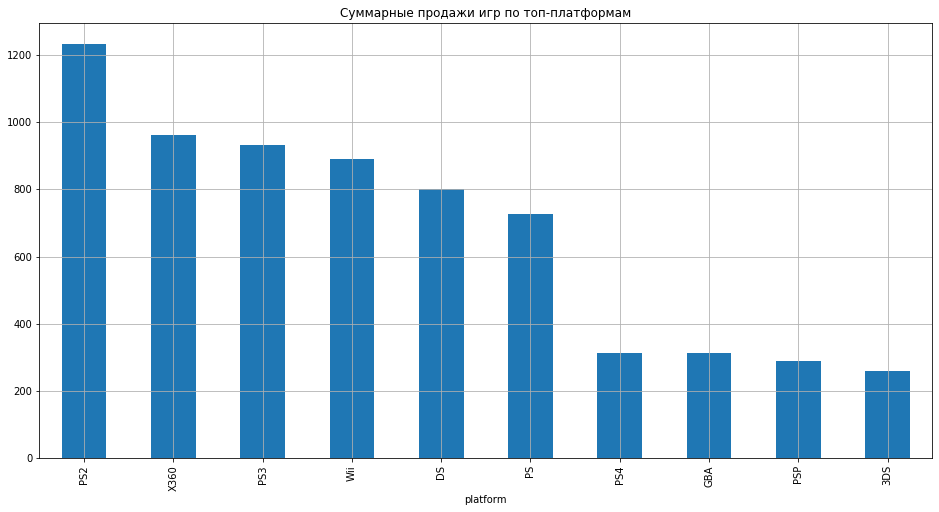

In [48]:
platforms = df.groupby('platform')['sales'].sum().sort_values(ascending=False)[0:10]
platforms.plot(title="Суммарные продажи игр по топ-платформам", kind='bar', figsize=(16,8), grid=True)

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

`head` на мой взгля выглядит аккуратнее, чем `[0:10]`
</div>

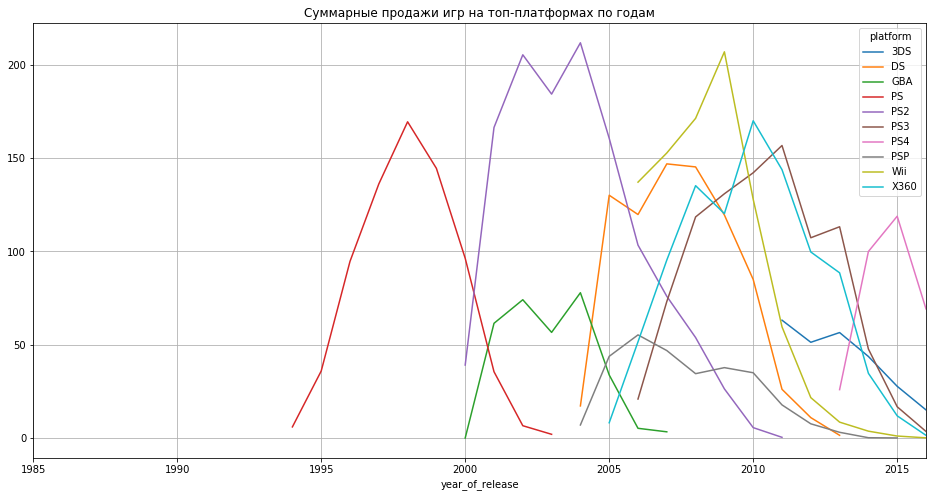

In [49]:
df.query('platform in @platforms.index').pivot_table(index='year_of_release', columns='platform',
values='sales', aggfunc='sum').plot(title="Суммарные продажи игр на топ-платформах по годам", figsize=(16,8), grid=True)

Заметим, что жизненный цикл платформы составляет около 9 лет, а платформы с наибольшими суммарными продажами это PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP и 3DS

Возьмем данные за соответствующий актуальный период, определим его на основании прошлых заданий. Основной фактор — эти данные помогут построить прогноз на 2017 год. Данные за другие периоды учитывать не будем. Поскольку жизненный цикл платформы составляет около 9 лет, то возьмем данные с 2013 года (2017 - 9/2), чтобы платформы к 2017 году не успели погибнуть, а были приблизительно на пике.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

> Возьмем данные с 2013 года (2017 - 9/2)

Абсолютно верно 👍
</div>

In [50]:
df_prognoz = df.query("year_of_release >= 2013")

Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

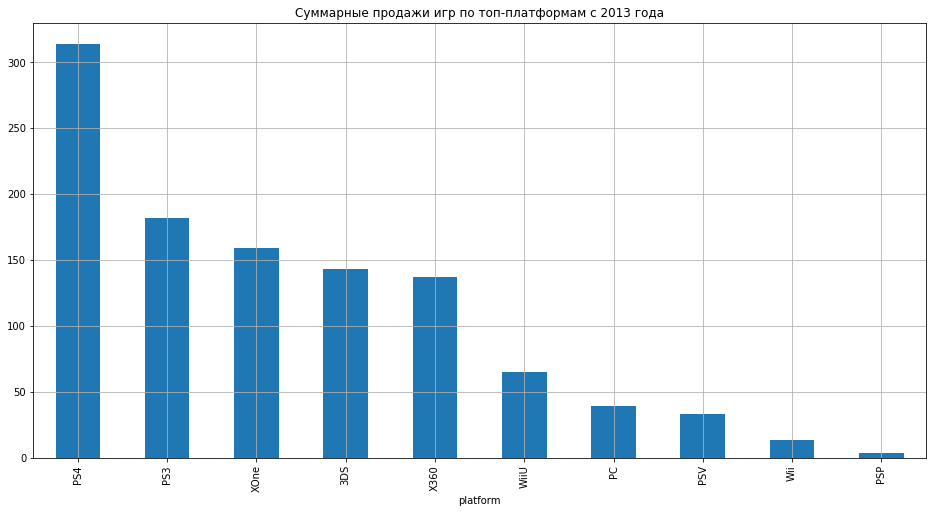

In [51]:
platforms = df_prognoz.groupby('platform')['sales'].sum().sort_values(ascending=False)[0:10]
platforms.plot(title="Суммарные продажи игр по топ-платформам с 2013 года", kind='bar', figsize=(16,8), grid=True)

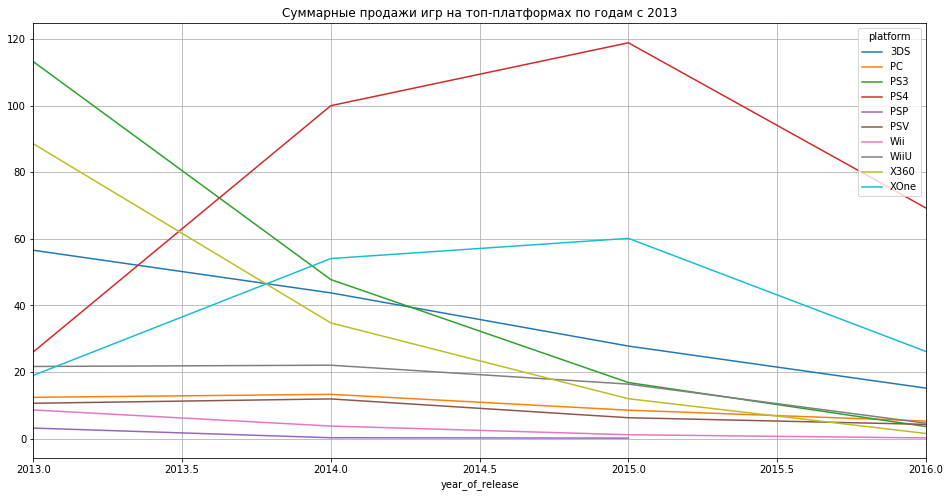

In [52]:
df_prognoz.query('platform in @platforms.index').pivot_table(index='year_of_release', columns='platform',
values='sales', aggfunc='sum').plot(title="Суммарные продажи игр на топ-платформах по годам с 2013", 
                                    figsize=(16,8), grid=True)

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Тут, возможно, удобнее было бы сделать `subplots` на одной фигуре
</div>

Лидирует PS4 и Xone, падают продажи по всем платформам, НО заметим, что в Wii, PSP, X360 совсем плохие результаты, видно, что жизненный цикл подходит к концу

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишием результат.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


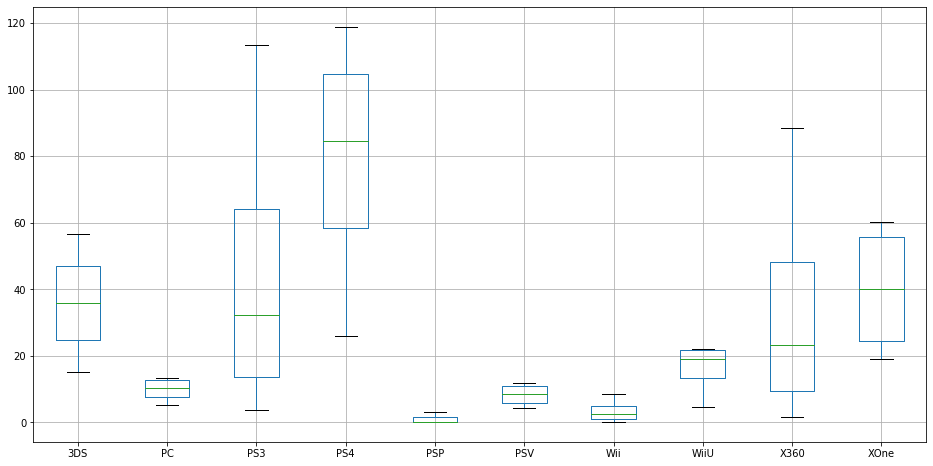

In [53]:
df_prognoz.query('platform in @platforms.index').pivot_table(index='year_of_release', columns='platform',
               values='sales', aggfunc='sum').boxplot(figsize=(16,8))

Заметим, выбросов нет, ящики расположены на разных уровнях из-за разных уровней продаж на каждой платформе. Также датасеты (PS3, Wii, X360) скошены вправо, датасеты (PS4, WiiU, ) влево, а датасеты (3DS, PC, PSV, XOne) посередине. Теперь посмотрим на статистические данные

In [54]:
df_prognoz.query('platform in @platforms.index').pivot_table(index='year_of_release', columns='platform',
               values='sales', aggfunc='sum').describe() 

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,4.000,4.000,4.000,4.000,3.000,4.000,4.000,4.000,4.000,4.000
mean,35.813,9.857,45.357,78.535,1.167,8.247,3.415,16.157,34.200,39.830
std,18.128,3.701,48.899,40.568,1.710,3.596,3.765,8.130,38.816,20.314
min,15.140,5.250,3.600,25.990,0.120,4.250,0.180,4.600,1.520,18.960
25%,24.620,7.702,13.515,58.435,0.180,5.750,0.900,13.413,9.350,24.353
50%,35.770,10.450,32.290,84.625,0.240,8.420,2.445,19.000,23.350,40.110
75%,46.963,12.605,64.133,104.725,1.690,10.917,4.960,21.745,48.200,55.587
max,56.570,13.280,113.250,118.900,3.140,11.900,8.590,22.030,88.580,60.140


Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

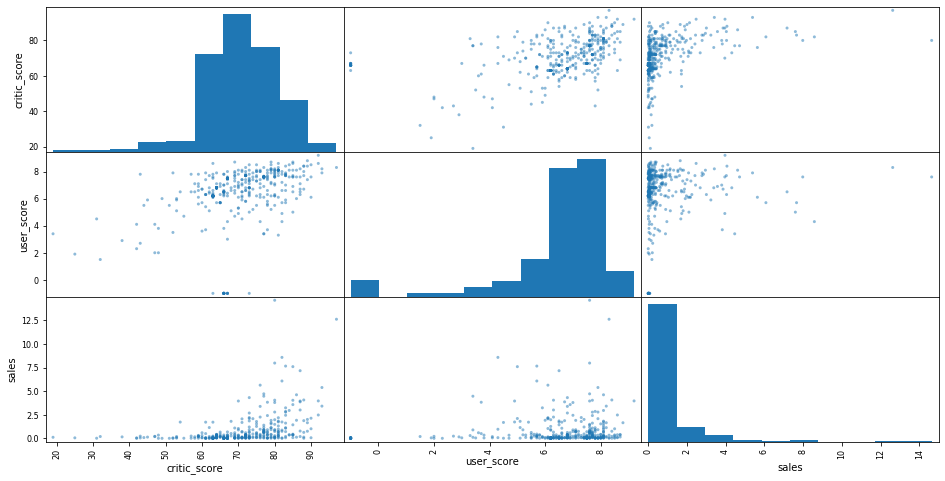

In [55]:
_ = pd.plotting.scatter_matrix(df_prognoz.query('platform == "PS4"')[['critic_score', 'user_score', 'sales']],
                           figsize=(16, 8))

In [56]:
df_prognoz.query('platform == "PS4"')[['critic_score', 'user_score', 'sales']].corr()

,critic_score,user_score,sales
critic_score,1.000,0.402,0.418
user_score,0.402,1.000,0.090
sales,0.418,0.090,1.000


1. Средняя положительная корреляция между отзывами критиков и продажами
2. Очень низкая положительная корреляция между отзывами пользователей и продажами
3. Средняя положительная корреляция между отзывами критиков и отзывами пользователей

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Перед тем, как считать корреляцию `-1` неплохо было бы выкинуть :) `pd.to_numeric('coerce')` бы заменил `tbd` на `NaN` и не надо было бы руками убирать, т.к. `corr()` пропуски не учитывает. В дальнейшем может быть полезно определять статистическую значимость корреляции https://docs.google.com/viewer?a=v&pid=sites&srcid=ZGVmYXVsdGRvbWFpbnxsdHdvb2R8Z3g6NDlhN2UwZTJkYWVhMTZkZQ

Чтобы в тетрадку не выводились строки типа `array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc1a182cb50>, ...` можно вниз ячейки добавить, например, пустой `print()` или так `_ = pd.plotting.scatter_matrix`
</div>

Соотнесем выводы с продажами игр на других платформах.

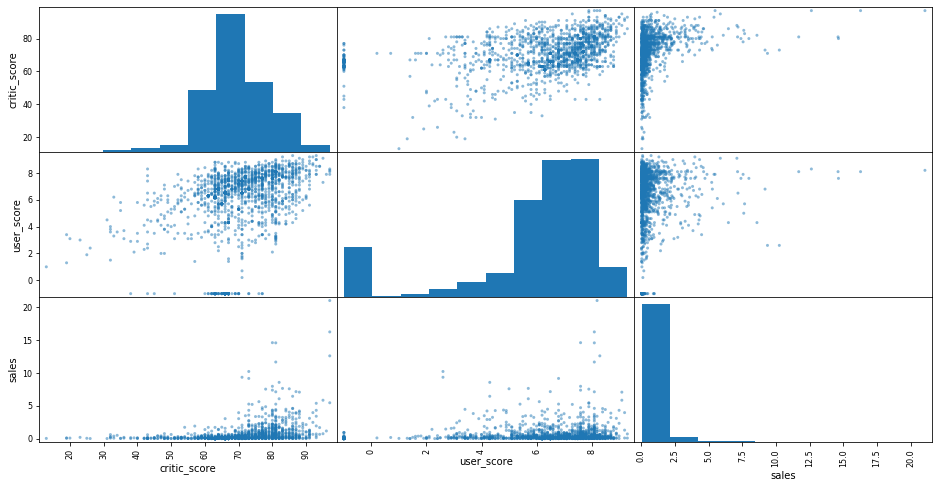

In [58]:
_ = pd.plotting.scatter_matrix(df_prognoz.query('platform in @platforms.index')[['critic_score', 'user_score', 'sales']],
                           figsize=(16, 8))

In [59]:
df_prognoz.query('platform in @platforms.index')[['critic_score', 'user_score', 'sales']].corr()

,critic_score,user_score,sales
critic_score,1.000,0.311,0.375
user_score,0.311,1.000,0.121
sales,0.375,0.121,1.000


1. В этом случае, положительная корреляция между отзывами критиков и продажами немного уменьшилась, но по прежнему средняя 
2. положительная корреляция между отзывами пользователей и продажами немного увеличилась, но по прежнему низкая 
3. А положительная корреляция между отзывами критиков и отзывами пользователей тоже немного уменьшилась, но по прежнему очень низкая 

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

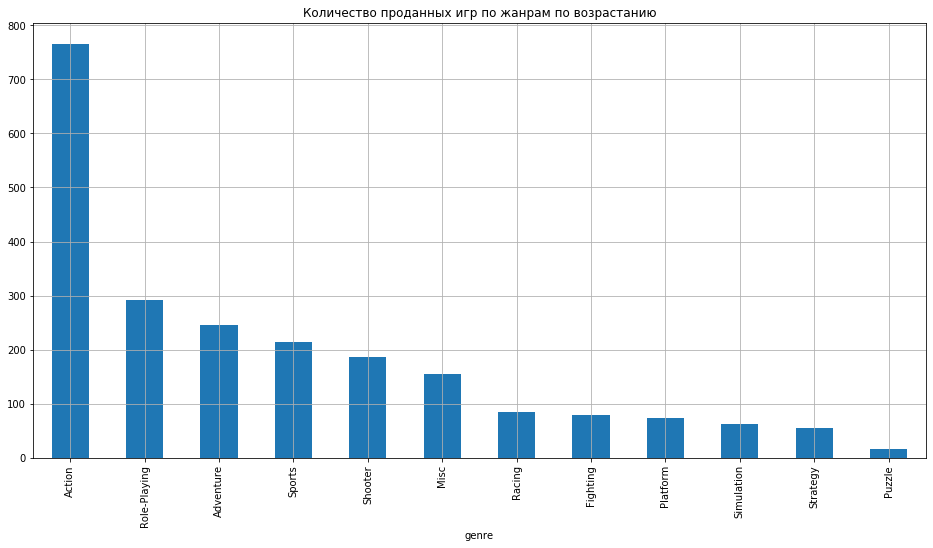

In [60]:
df_prognoz.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar',
                        title='Количество проданных игр по жанрам по возрастанию', figsize=(16,8), grid=True)

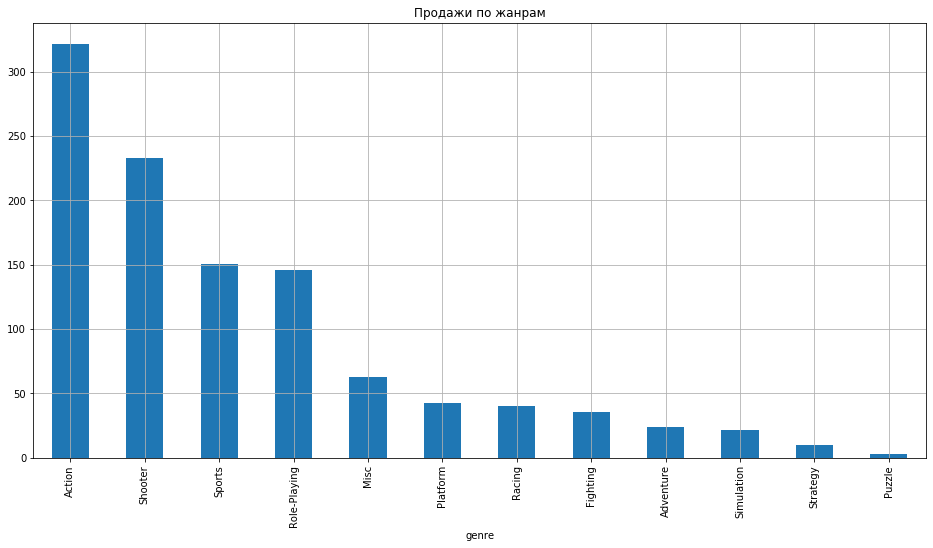

In [61]:
df_prognoz.groupby('genre')['sales'].sum().sort_values(ascending=False).plot(kind='bar', 
                                 title='Продажи по жанрам', figsize=(16,8), grid=True)

* Самые прибыльные жанры: Action, Shooter, Sports, Role-Playing
* Жанры с низкими продажами: Puzzle, Strategy, Simulation, Adventure
* Больше всего игр жанра: Action, Role-Playing, Adventure, Sports, Shooter и Misc
* Меньше всего игр жанра: Puzzle, Strategy, Simulation, Platform

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Если наложить эти два графика друг на дргуа, получится среднее число продаж, и как можно заметить, шутер будет в среднем самым успешным
</div>

### Вывод
<a id="conclusion3"></a>

В результате ИАД получились следующие выводы:
1. Выявили актуальный период - начиная с 2013 года
2. Определили жизненный цикл платформы - приблизительно 9 лет
3. Представили лидирующие платформы - PS4 и Xone, но стоит отметить, что падают продажи по всем платформам, а у Wii, PSP, X360 совсем плохие результаты, видно, что их жизненный цикл подходит к концу
4. По корреляции в общем и частном случаях (на примере PS4):
    * Средняя положительная корреляция между отзывами критиков и продажами
    * Очень низкая положительная корреляция между отзывами пользователей и продажами
    * Средняя положительная корреляция между отзывами критиков и отзывами пользователей
5. По продажам: 
    * Самые прибыльные жанры: Action, Shooter, Sports, Role-Playing
    * Жанры с низкими продажами: Puzzle, Strategy, Simulation, Adventure
    * Больше всего игр жанра: Action, Role-Playing, Adventure, Sports, Shooter и Misc
    * Меньше всего игр жанра: Puzzle, Strategy, Simulation, Platform

## Анализ данных
<a id="data_analysis"></a>

Cоставим портрет пользователя каждого региона, определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Сгруппируем данные по платформе и посчитаем продажи для каждой платформы в отдельном регионе

In [62]:
top_na_p = df_prognoz.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', 
                                                                                        ascending=False)[0:5]
top_na_p

,na_sales
platform,
PS4,108.740
XOne,93.120
X360,81.660
PS3,63.500
3DS,38.200


In [63]:
top_eu_p = df_prognoz.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', 
                                                                                        ascending=False)[0:5]
top_eu_p

,eu_sales
platform,
PS4,141.090
PS3,67.810
XOne,51.590
X360,42.520
3DS,30.960


In [64]:
top_jp_p = df_prognoz.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', 
                                                                                        ascending=False)[0:5]
top_jp_p

,jp_sales
platform,
3DS,67.810
PS3,23.350
PSV,18.590
PS4,15.960
WiiU,10.880


1. Самые популярные платформы (топ-5) для NA:
    * PS4 - 108.740
    * XOne - 93.120
    * X360 - 81.660
    * PS3 - 63.500
    * 3DS - 38.200
2. Самые популярные платформы (топ-5) для EU:
    * PS4 - 141.090
    * PS4 - 67.810
    * XOne - 51.590
    * X360 - 42.520
    * 3DS - 30.960
3. Самые популярные платформы (топ-5) для JP:
    * 3DS - 67.810
    * PS3 - 23.350
    * PSV - 18.590
    * PS4 - 15.960
    * WiiU - 10.880

В NA и EU списки лидеров приблизительно идентичны, что нельзя сказать о JP, здесь побеждает платформа 3DS, причем значительно по отношению к другим платформам, также в этом топе появились WiiU и PSV. Стоит отметить, что в EU выделяетя существенная разница в продажах между PS4 (1 место) и PS3 (2 место).

Сгруппируем данные по жанру и посчитаем продажи для каждого жанра в отдельном регионе

In [65]:
top_na_g = df_prognoz.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', 
                                                                                        ascending=False)[0:5]
top_na_g

,na_sales
genre,
Action,126.050
Shooter,109.740
Sports,65.270
Role-Playing,46.400
Misc,27.490


In [66]:
top_eu_g = df_prognoz.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', 
                                                                                        ascending=False)[0:5]
top_eu_g

,eu_sales
genre,
Action,118.130
Shooter,87.860
Sports,60.520
Role-Playing,36.970
Racing,20.190


In [67]:
top_jp_g = df_prognoz.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', 
                                                                                        ascending=False)[0:5]
top_jp_g

,jp_sales
genre,
Role-Playing,51.040
Action,40.490
Misc,9.200
Fighting,7.650
Shooter,6.610


1. Самые популярные жанры (топ-5) для NA:
    * Action - 126.050
    * Shooter - 109.740
    * Sports - 65.270
    * Role-Playing - 46.400
    * Misc - 27.490
2. Самые популярные жанры (топ-5) для EU:
    * Action - 118.130
    * Shooter - 87.860
    * Sports - 60.520
    * Role-Playing - 36.970
    * Racing - 20.190
3. Самые популярные жанры (топ-5) для JP:
    * Role-Playing - 51.040
    * Action - 40.490
    * Misc - 9.200
    * Fighting - 7.650
    * Shooter - 6.610

Аналогичная ситуация и с жанрами, топы у EU и NA приблизительно идентичны, но последний жанр в этих списках отличается, в NA больше любят аркады, а в EU гонки. Равным образом, ситуация и в JP, здесь порядок в топе кардинально отличается от EU и NA. В JP больше всего любят ролевые игры и 'боевые', а также в этот список попали драки

In [68]:
top_np_e = df_prognoz.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', 
                                                                                        ascending=False)
top_np_e

,na_sales
rating,
M,165.210
missed,89.420
E,79.050
E10+,54.240
T,49.790


In [69]:
top_eu_e = df_prognoz.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', 
                                                                                        ascending=False)
top_eu_e

,eu_sales
rating,
M,145.320
E,83.360
missed,78.910
E10+,42.690
T,41.950


In [70]:
top_jp_e = df_prognoz.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', 
                                                                                        ascending=False)
top_jp_e

,jp_sales
rating,
missed,85.050
T,20.590
E,15.140
M,14.110
E10+,5.890


В результате, рейтинг ESRB влияет на продажи в каждом отдельном регионе, если не учитывать пропущенные значения, то EU и NA опять же аналогичная ситуация, а в JP список представлен в другом порядке, в JP лидируют игры с ограничением T (16 лет) и E (7 лет), когда в EU и NA лидируют с M (18 лет) и E (12 лет). В общем лидируют игры с возрастным ограничением в 18 и 12 лет.
* Самые популярные рейтинги для NA:
    * M	- 165.210
    * E - 79.050
    * E10+ - 54.240
    * T - 49.790
* Самые популярные платформы для EU:
    * M - 145.320
    * E - 83.360
    * E10+ - 42.690
    * T - 41.950
* Самые популярные платформы для JP:
    * T	- 20.590
    * E	- 15.140
    * M	- 14.110
    * E10+ - 5.890

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

Здесь пропуски на первом месте для Японии должны были насторожить :) Если сделать срез по `missed` там будут в основном японские игры, т.е. для локального рынка. Так как ESRB это западная организация, то игры для неамериканского рынка она не рецензирует. Таблица выше показывает, что в Японии крепкий локальный рынок 
</div>

### Вывод
<a id="conclusion4"></a>

1. В NA и EU списки лидеров приблизительно идентичны, что нельзя сказать о JP, здесь побеждает платформа 3DS, причем значительно по отношению к другим платформам, также в этом топе появились WiiU и PSV. Стоит отметить, что в EU выделяетя существенная разница в продажах между PS4 (1 место) и PS3 (2 место).
* Самые популярные платформы (топ-5) для NA:
    * PS4 - 108.740
    * XOne - 93.120
    * X360 - 81.660
    * PS3 - 63.500
    * 3DS - 38.200
* Самые популярные платформы (топ-5) для EU:
    * PS4 - 141.090
    * PS4 - 67.810
    * XOne - 51.590
    * X360 - 42.520
    * 3DS - 30.960
* Самые популярные платформы (топ-5) для JP:
    * 3DS - 67.810
    * PS3 - 23.350
    * PSV - 18.590
    * PS4 - 15.960
    * WiiU - 10.880
2. Аналогичная ситуация и с жанрами, топы у EU и NA приблизительно идентичны, но последний жанр в этих списках отличается, в NA больше любят аркады, а в EU гонки. Равным образом, ситуация и в JP, здесь порядок в топе кардинально отличается от EU и NA. В JP больше всего любят ролевые игры и 'боевые', а также в этот список попали драки
* Самые популярные жанры (топ-5) для NA:
    * Action - 126.050
    * Shooter - 109.740
    * Sports - 65.270
    * Role-Playing - 46.400
    * Misc - 27.490
* Самые популярные жанры (топ-5) для EU:
    * Action - 118.130
    * Shooter - 87.860
    * Sports - 60.520
    * Role-Playing - 36.970
    * Racing - 20.190
* Самые популярные жанры (топ-5) для JP:
    * Role-Playing - 51.040
    * Action - 40.490
    * Misc - 9.200
    * Fighting - 7.650
    * Shooter - 6.610
3. В результате, рейтинг ESRB влияет на продажи в каждом отдельном регионе, если не учитывать пропущенные значения, то EU и NA опять же аналогичная ситуация, а в JP список представлен в другом порядке, в JP лидируют игры с ограничением T (16 лет) и E (7 лет), когда в EU и NA лидируют с M (18 лет) и E (12 лет). В общем лидируют игры с возрастным ограничением в 18 и 12 лет.
* Самые популярные рейтинги для NA:
    * M - 165.210
    * E - 79.050
    * E10+ - 54.240
    * T - 49.790
* Самые популярные платформы для EU:
    * M - 145.320
    * E - 83.360
    * E10+ - 42.690
    * T - 41.950
* Самые популярные платформы для JP:
    * T - 20.590
    * E - 15.140
    * M - 14.110
    * E10+ - 5.890

## Проверка гипотез
<a id="hypothesis_testing"></a>

Проверим гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

То есть необходимо проверить гипотезы о равенстве средних 2 генеральных совокупностей и они двусторонние
1. В первом случае:
    * H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны) (т.к. H0 всегда формулируется так, чтобы использовать знак равенства), тогда
    * H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются;
2. Во втором случае:
    * H0 - Средние пользовательские рейтинги жанров Action  и Sports одинаковые (равны), тогда
    * H1 - Средние пользовательские рейтинги жанров Action и Sports разные.

In [71]:
alpha = 0.05 # критический уровень статистической значимости

Построим распределения каждой выборки и узнаем дисперсии

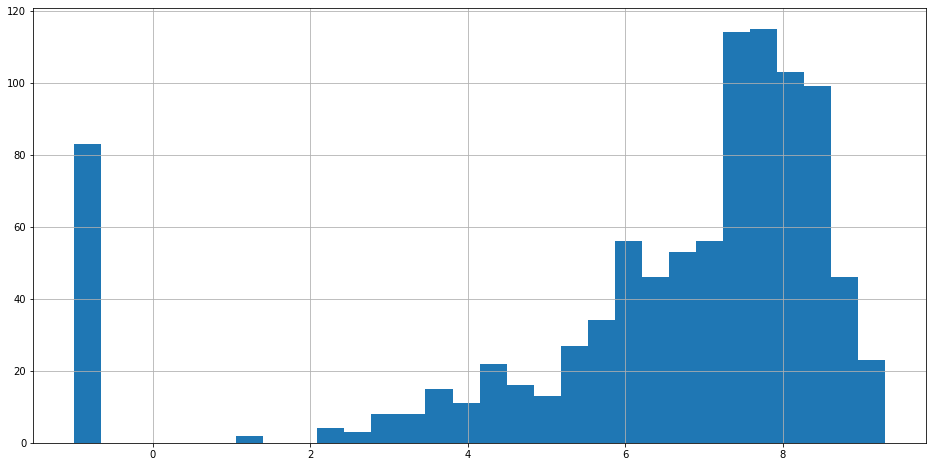

In [72]:
df.query('platform=="PC"')['user_score'].hist(figsize=(16,8), bins=30)

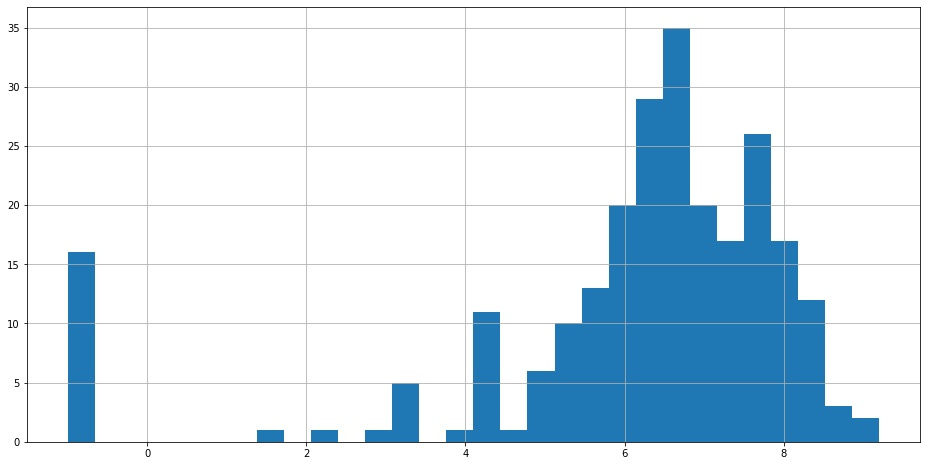

In [73]:
df.query('platform=="XOne"')['user_score'].hist(figsize=(16,8), bins=30)

In [74]:
df.query('platform=="XOne"')['user_score'].describe()

count   247.000
mean      6.059
std       2.238
min      -1.000
25%       5.700
50%       6.600
75%       7.400
max       9.200
Name: user_score, dtype: float64

In [75]:
df.query('platform=="PC"')['user_score'].describe()

count   957.000
mean      6.339
std       2.663
min      -1.000
25%       5.800
50%       7.300
75%       8.100
max       9.300
Name: user_score, dtype: float64

Заметили наш из 2 пункта -1, то есть значения tbd, а также нормальное распределение и можем сделать equal_var = False, поскольку дисперсии разные

In [76]:
results1 = st.ttest_ind(df.query('platform=="XOne"')['user_score'], df.query('platform=="PC"')['user_score']
                        , equal_var = False) #проверка о равенстве в 1 случае

In [77]:
results1.pvalue

0.0937212113640699

In [78]:
if (results1.pvalue < alpha) and \
(df.query('platform=="XOne"')['user_score'].mean() != df.query('platform=="PC"')['user_score'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Не получилось отвергнуть нулевую гипотезу


Теперь для 2 гипотезы построим распределения каждой выборки и узнаем дисперсии, уберем -1 с помощью range

In [ ]:
df.query('genre=="Action"')['user_score'].hist(figsize=(16,8), bins=20, range=(0,10))

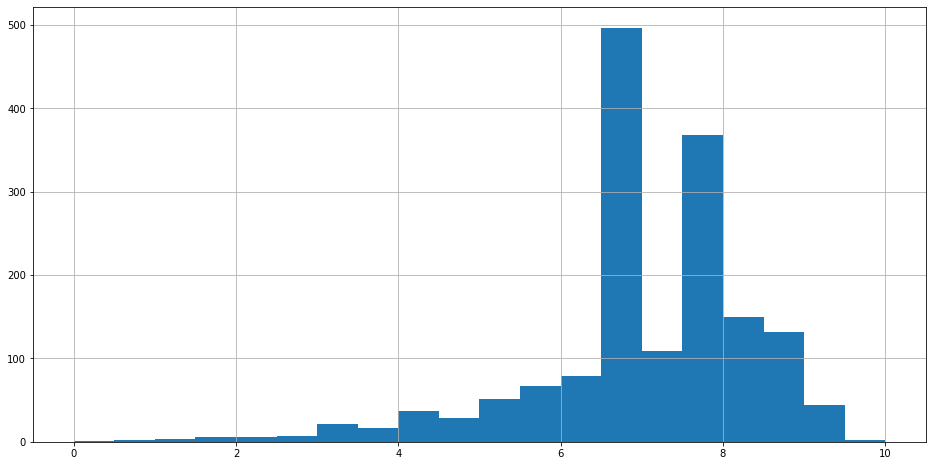

In [91]:
df.query('genre=="Sports"')['user_score'].hist(figsize=(16,8), bins=20, range=(0,10))

In [92]:
df.query('genre=="Action"')['user_score'].describe()

count   3307.000
mean       6.014
std        2.718
min       -1.000
25%        6.200
50%        6.800
75%        7.600
max        9.500
Name: user_score, dtype: float64

In [93]:
df.query('genre=="Sports"')['user_score'].describe()

count   2306.000
mean       4.577
std        3.777
min       -1.000
25%       -1.000
50%        6.500
75%        7.500
max        9.500
Name: user_score, dtype: float64

У нас также нормальное распределение и мы можем сделать equal_var = False, поскольку дисперсии разные

In [94]:
results2 = st.ttest_ind(df.query('genre=="Action"')['user_score'], df.query('genre=="Sports"')['user_score']
                        , equal_var = False) #проверка о равенстве в 1 случае

In [95]:
results2.pvalue

1.1219447589709392e-53

In [96]:
if (results2.pvalue < alpha) and \
(df.query('genre=="Action"')['user_score'].mean() != df.query('genre=="Sports"')['user_score'].mean()):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Отвергаем нулевую гипотезу


### Вывод
<a id="conclusion5"></a>

1. В первом случае не удалось отвергнуть H0 (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны)), значит,
   Средние пользовательские рейтинги платформ Xbox One и PC различаются - не подтвердилась;
2. Во втором случае отвергли H0 (Средние пользовательские рейтинги жанров Action  и Sports одинаковые (равны)), значит, средние пользовательские рейтинги жанров Action и Sports разные - подтвердилась.

<div class="alert alert-success">
<h2>Комментарий ревьюера</h2>

В целом верно, `-1` конечно тоже надо было выкинуть, чтобы не смещал средние. Молодец, что не забываешь про `equal_var`. Для т-теста вообще говоря нужно не нормальное распределение, а нормальное распределение для выборочных средних, что достигается на практике в целом на выборках размера > 30 . В теории для этого есть центральная предельная теорема https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0
    
    
> `(df.query('genre=="Action"')['user_score'].mean() != df.query('genre=="Sports"')['user_score'].mean()`
    
Так писать не надо, т.к. это по факту ещё один тест и в таком случае ты уже по-другому должен интерпретировать `p-value` и уровень значимости. Равенство выборочных средних вообще говоря ни о чём не говорит
</div>

## Общий вывод
<a id="conclusion"></a>

В результате проделанной работы было выполнено:
1. В изучении данных из файла:
    * Обнаружили странное значение tbd
    * Продемонстрировали в NA_sales и EU_sales выбросы
    * Заметили, что нужно изменить тип данных в Critic_Score, Year_of_Release
    * Выявили пропуски в Critic_Score, User_Score, Rating, Name и Year_of_Release
2. В предобработке данных:
    * Описали проблемы появления пропусков. Значения оказались пропущены в Name, например, по причине сбоя в кодировке, в Year_of_Release из-за правильного формата записи даты, а здесь вместо даты - год и он вещественное число, в Critic_Score, User_Score большой процент пропуска, который связан, видимио, с ошибкой при выгрузке, т.к. если их не заполнили из-за того, что они не набрали нужного кол-ва отзывов, заполнили бы их tbd. А в Rating организация ESRB еще не определила рейтинг и не присвоила подходящую возрастную категорию из-за чего появились пропуски.
    * Описали причину появления tbd и обработали его. Как уточнялось, TBD это обычно не вышедшие игры, или вышедшие совсем недавно и не набравшие критическую массу отзывов. Заменили его на -1 и не учитывали при обработке.
    * Заполнили пропуски в User_Score и Critic_Score на основании среднего по жанру и конкретизированному уровню продаж, а в Rating - значением missed, т.к определить категорию на основании средних или частых значений по определенному жанру не можем, поскольку это может сильно отличаться от действительности.. 
    * Изменили названия столбцов (ниж. регистр) 
    * Удалили строки с пропусками в Name и Year_of_Release
    * Преобразовали данные в нужные типы данных: Critic_Score - int,а Year_of_Release - int
    * Посчитали общие продажи sales
    * Конкретизировали продажи на 3 уровня - низкий, средний, высокий 
3. В исследовательском анализе данных:
    * Выявили актуальный период - начиная с 2013 года
    * Определили жизненный цикл платформы - приблизительно 9 лет
    * Представили лидирующие платформы - PS4 и Xone, но стоит отметить, что падают продажи по всем платформам, а у Wii, PSP, X360 совсем плохие результаты, видно, что их жизненный цикл подходит к концу
    * По корреляции в общем и частном случаях (на примере PS4):
        1. Средняя положительная корреляция между отзывами критиков и продажами
        2. Очень низкая положительная корреляция между отзывами пользователей и продажами
        3. Средняя положительная корреляция между отзывами критиков и отзывами пользователей
    * По продажам: 
        1. Самые прибыльные жанры: Action, Shooter, Sports, Role-Playing
        2. Жанры с низкими продажами: Puzzle, Strategy, Simulation, Adventure
        3. Больше всего игр жанра: Action, Role-Playing, Adventure, Sports, Shooter и Misc
        4. Меньше всего игр жанра: Puzzle, Strategy, Simulation, Platform
4. В анализе данных cоставим портрет пользователя каждого региона, определим для пользователя каждого региона (NA, EU, JP):
    1. Самые популярные платформы (топ-5). Опишем различия в долях продаж. В NA и EU списки лидеров приблизительно идентичны, что нельзя сказать о JP, здесь побеждает платформа 3DS, причем значительно по отношению к другим платформам, также в этом топе появились WiiU и PSV. Стоит отметить, что в EU выделяетя существенная разница в продажах между PS4 (1 место) и PS3 (2 место).
    * Самые популярные платформы (топ-5) для NA:
        * PS4 - 108.740
        * XOne - 93.120
        * X360 - 81.660
        * PS3 - 63.500
        * 3DS - 38.200
    * Самые популярные платформы (топ-5) для EU:
        * PS4 - 141.090
        * PS4 - 67.810
        * XOne - 51.590
        * X360 - 42.520
        * 3DS - 30.960
    * Самые популярные платформы (топ-5) для JP:
        * 3DS - 67.810
        * PS3 - 23.350
        * PSV - 18.590
        * PS4 - 15.960
        * WiiU - 10.880
    2. Самые популярные жанры (топ-5). Поясним разницу. Аналогичная ситуация и с жанрами, топы у EU и NA приблизительно идентичны, но последний жанр в этих списках отличается, в NA больше любят аркады, а в EU гонки. Равным образом, ситуация и в JP, здесь порядок в топе кардинально отличается от EU и NA. В JP больше всего любят ролевые игры и 'боевые', а также в этот список попали драки
    * Самые популярные жанры (топ-5) для NA:
        * Action - 126.050
        * Shooter - 109.740
        * Sports - 65.270
        * Role-Playing - 46.400
        * Misc - 27.490
    * Самые популярные жанры (топ-5) для EU:
        * Action - 118.130
        * Shooter - 87.860
        * Sports - 60.520
        * Role-Playing - 36.970
        * Racing - 20.190
    * Самые популярные жанры (топ-5) для JP:
        * Role-Playing - 51.040
        * Action - 40.490
        * Misc - 9.200
        * Fighting - 7.650
        * Shooter - 6.610
    3. В результате, рейтинг ESRB влияет на продажи в каждом отдельном регионе, если не учитывать пропущенные значения, то EU и NA опять же аналогичная ситуация, а в JP список представлен в другом порядке, в JP лидируют игры с ограничением T (16 лет) и E (7 лет), когда в EU и NA лидируют с M (18 лет) и E (12 лет). В общем лидируют игры с возрастным ограничением в 18 и 12 лет.
    * Самые популярные рейтинги для NA:
        * M - 165.210
        * E - 79.050
        * E10+ - 54.240
        * T - 49.790
    * Самые популярные платформы для EU:
        * M - 145.320
        * E - 83.360
        * E10+ - 42.690
        * T - 41.950
    * Самые популярные платформы для JP:
        * T - 20.590
        * E - 15.140
        * M - 14.110
        * E10+ - 5.890
5. В проверке гипотез проверим гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    * В первом случае не удалось отвергнуть H0 (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые (равны)), значит, Средние пользовательские рейтинги платформ Xbox One и PC различаются - не подтвердилась;
    * Во втором случае отвергли H0 (Средние пользовательские рейтинги жанров Action и Sports одинаковые (равны)), значит, средние пользовательские рейтинги жанров Action и Sports разные - подтвердилась.